In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import decomposition, preprocessing

In [2]:
data = pd.read_csv("Données/decathlon.txt", sep="\t")
data.head()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [4]:
#On supprime les données non numérique ainsi que le rank qui ne sont pas pertinent pour notre analyse PCA
my_data = data.drop(["Rank","Points","Competition"], axis=1)

In [5]:
#On récupère les valeurs de notre table (sans les colonnes et l'index)
X = my_data.values

In [10]:
#On initialise la fonction de Scalage
standard_scaler = preprocessing.StandardScaler().fit(X)

#On transform nos données
X_scaled = standard_scaler.transform(X)

In [13]:
#On initialise notre PCA avec 2 composents
pca = decomposition.PCA(n_components=2)

In [15]:
#On fit nos données avec la variable PCA
pca.fit(X_scaled)

PCA(n_components=2)

In [17]:
#On regarde le ratio de l'importance de nos composents
print(pca.explained_variance_ratio_.cumsum())

[0.32719055 0.50090366]


In [20]:
#On projette nos données
X_projected = pca.transform(X_scaled)

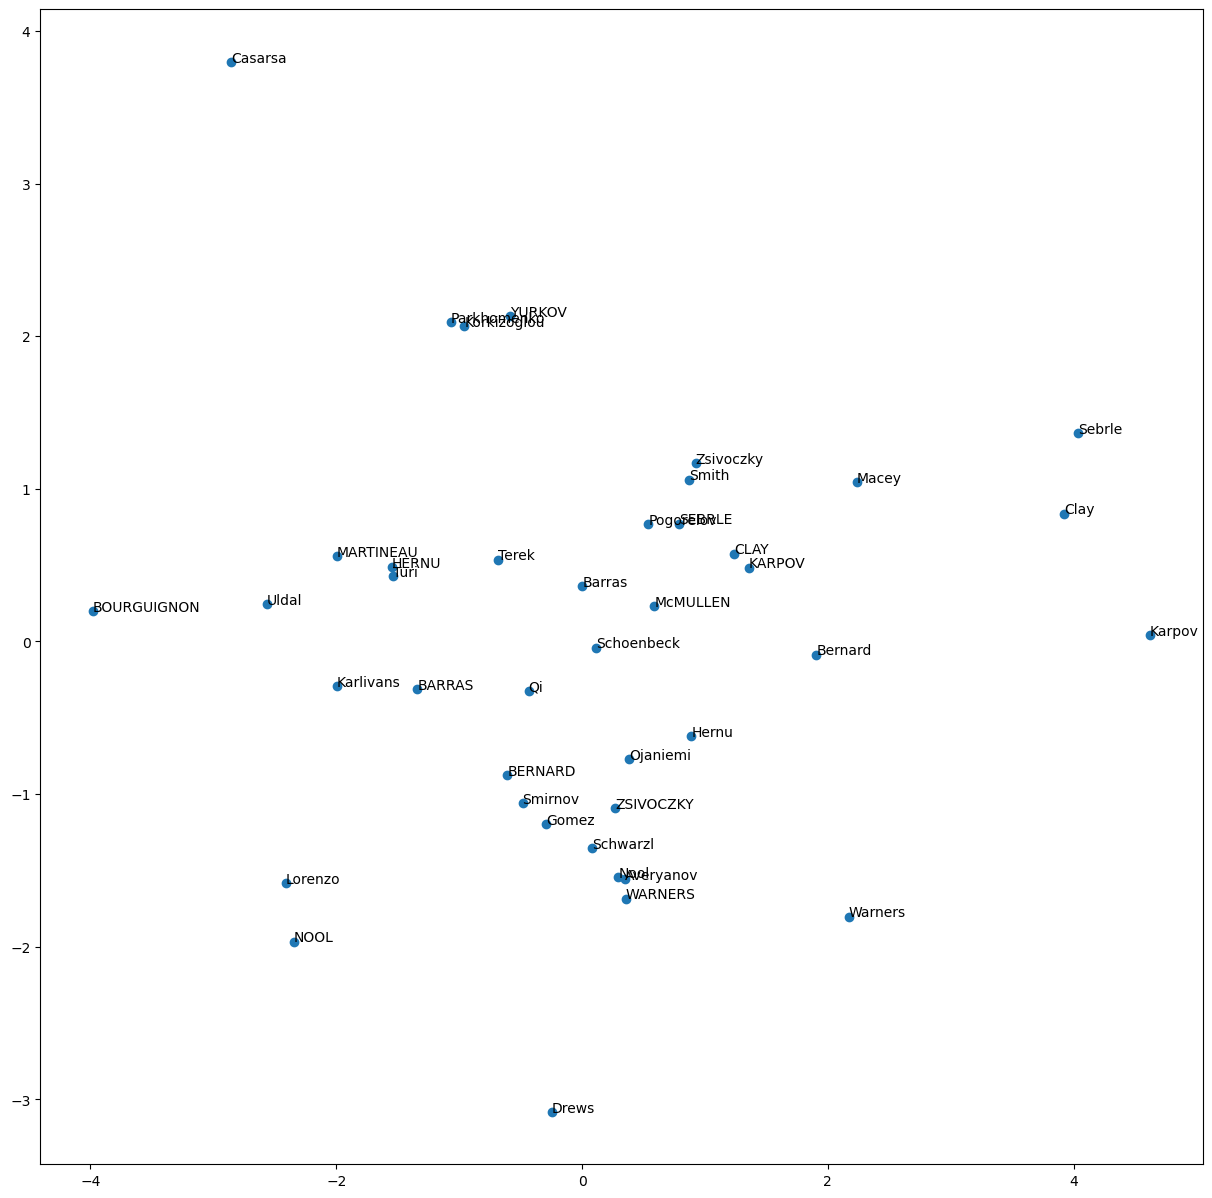

In [22]:
#On génère notre graphique
plt.figure(figsize=(15,15))

plt.scatter(X_projected[:,0], X_projected[:,1])

for i, (x,y) in enumerate(zip(X_projected[:,0], X_projected[:,1])):
    plt.text(x,y,data.index[i])

In [33]:
X_projected

array([[ 7.91627717e-01,  7.71611196e-01],
       [ 1.23499056e+00,  5.74578065e-01],
       [ 1.35821494e+00,  4.84020901e-01],
       [-6.09515083e-01, -8.74628529e-01],
       [-5.85968338e-01,  2.13095422e+00],
       [ 3.56889530e-01, -1.68495667e+00],
       [ 2.71774781e-01, -1.09377558e+00],
       [ 5.87516189e-01,  2.30729912e-01],
       [-1.99535930e+00,  5.60995982e-01],
       [-1.54607646e+00,  4.88383011e-01],
       [-1.34165273e+00, -3.10911571e-01],
       [-2.34497381e+00, -1.96637500e+00],
       [-3.97904186e+00,  1.99860190e-01],
       [ 4.03844850e+00,  1.36582606e+00],
       [ 3.91936516e+00,  8.36961363e-01],
       [ 4.61998728e+00,  3.99952289e-02],
       [ 2.23346057e+00,  1.04176620e+00],
       [ 2.16839645e+00, -1.80320025e+00],
       [ 9.25132183e-01,  1.16865180e+00],
       [ 8.89037852e-01, -6.18425216e-01],
       [ 2.95305667e-01, -1.54561667e+00],
       [ 1.90633437e+00, -8.58042918e-02],
       [ 8.10786594e-02, -1.35345710e+00],
       [ 5.

In [23]:
pcs = pca.components_

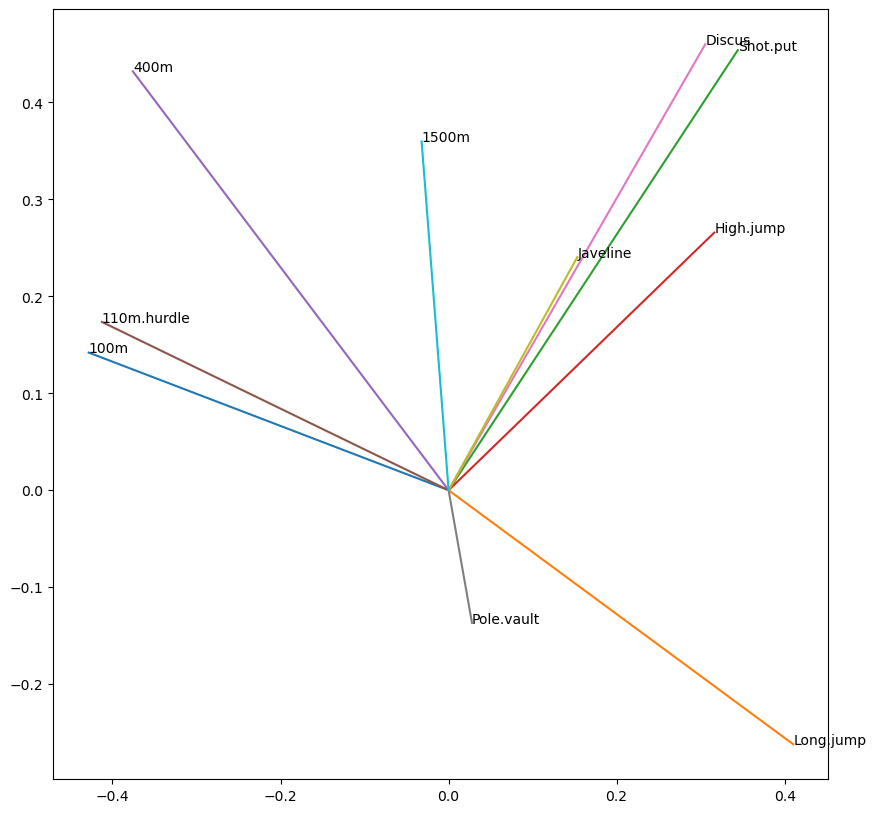

In [31]:
plt.figure(figsize=(10,10))

for i,(x,y) in enumerate(zip(pcs[0,:], pcs[1,:])):
    plt.plot([0,x], [0,y])
    plt.text(x,y, data.columns[i])

In [32]:
pcs

array([[-0.42829627,  0.41015201,  0.34414444,  0.31619436, -0.3757157 ,
        -0.41255442,  0.30542571,  0.02783081,  0.15319802, -0.03210733],
       [ 0.14198909, -0.26207936,  0.45394697,  0.2657761 ,  0.432046  ,
         0.17359096,  0.4600244 , -0.13684105,  0.24050715,  0.35980486]])